# Credit Card Spending Analysis


### 1. importing data

In [2562]:
#Downloading packages
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install statsmodels
!pip install pmdarima

In [2563]:
#importing packages

import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'


In [2564]:
#Locate the CSV file and load

os.chdir("../SpendingAnalysis/")
df1 = pd.read_csv("2021BA.csv")
df2 = pd.read_csv("2022BA.csv")
df3 = pd.read_csv("2022P.csv")
df = pd.concat([df1, df2, df3], axis=0)

In [2565]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 856 entries, 0 to 306
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         856 non-null    object 
 1   Description  856 non-null    object 
 2   Amount       856 non-null    float64
dtypes: float64(1), object(2)
memory usage: 26.8+ KB


We have 856 rows

In [2566]:
df

,Date,Description,Amount
0,30/12/2021,ASDA STORES FELTHAM,13.26
1,29/12/2021,TESCO STORE 2532 2532TE FELTHAM,1.81
2,29/12/2021,TESCO STORE 2532 2532TE FELTHAM,16.84
3,25/12/2021,IZ *GNDJ LIMITED FELTHAM,5.19
4,23/12/2021,IZ *LITTLE KATHMANDU EDGWARE,5.00
...,...,...,...
302,03/04/2022,IHS169516352PA02 2022-0 IMM HEALTH SURC,1248.00
303,02/04/2022,ASDA STORES FELTHAM,6.99
304,29/03/2022,LIDL LON FELTHAM 0058 FELTHAM,21.65
305,26/03/2022,TFL TRAVEL CHARGE TFL.GOV.UK/CP,7.20


We are only going to take the spending and remove the credit card bill paid.
Now its filtered to 796 rows

In [2567]:
df = df[df['Amount']>0]
df

,Date,Description,Amount
0,30/12/2021,ASDA STORES FELTHAM,13.26
1,29/12/2021,TESCO STORE 2532 2532TE FELTHAM,1.81
2,29/12/2021,TESCO STORE 2532 2532TE FELTHAM,16.84
3,25/12/2021,IZ *GNDJ LIMITED FELTHAM,5.19
4,23/12/2021,IZ *LITTLE KATHMANDU EDGWARE,5.00
...,...,...,...
302,03/04/2022,IHS169516352PA02 2022-0 IMM HEALTH SURC,1248.00
303,02/04/2022,ASDA STORES FELTHAM,6.99
304,29/03/2022,LIDL LON FELTHAM 0058 FELTHAM,21.65
305,26/03/2022,TFL TRAVEL CHARGE TFL.GOV.UK/CP,7.20


### 2. Extracting the location Keyword from the description

In [2568]:
!pip install requests

In [2569]:
#Getting the cities keyword from a url and setting as a list

import requests
import json

cities_url = "https://raw.githubusercontent.com/russ666/all-countries-and-cities-json/6ee538beca8914133259b401ba47a550313e8984/countries.json"
cities_json = json.loads(requests.get(cities_url).content.decode('utf8'))

cities = set(cities_json.get('United Kingdom', []))


2.1. __Parsing the location keyword using flashtext__

In [2570]:
!pip install flashtext

In [2571]:

from flashtext import KeywordProcessor

keyword_processor = KeywordProcessor(case_sensitive=False)
keyword_processor.add_keywords_from_list(sorted(cities))


In [2572]:
texts = '33CPAYMENT*PRET A MANGER LONDON'
keyword_processor.extract_keywords(texts)

['London']

In [2573]:
#applying the parsed keyword to a new column called 'Location'. Alternatively filling the field as UK where we could not parse cities

df['Location'] = df['Description'].apply(keyword_processor.extract_keywords).str[0].fillna('UK')


In [2574]:
#Removing the brackets

df['Location'] = df['Location'].str.replace('[', '').str.replace(']', '')

In [2575]:
df['Location']

0      Feltham
1      Feltham
2      Feltham
3      Feltham
4      Edgware
        ...   
302         UK
303    Feltham
304    Feltham
305         UK
306         UK
Name: Location, Length: 796, dtype: object

In [2576]:
df

,Date,Description,Amount,Location
0,30/12/2021,ASDA STORES FELTHAM,13.26,Feltham
1,29/12/2021,TESCO STORE 2532 2532TE FELTHAM,1.81,Feltham
2,29/12/2021,TESCO STORE 2532 2532TE FELTHAM,16.84,Feltham
3,25/12/2021,IZ *GNDJ LIMITED FELTHAM,5.19,Feltham
4,23/12/2021,IZ *LITTLE KATHMANDU EDGWARE,5.00,Edgware
...,...,...,...,...
302,03/04/2022,IHS169516352PA02 2022-0 IMM HEALTH SURC,1248.00,UK
303,02/04/2022,ASDA STORES FELTHAM,6.99,Feltham
304,29/03/2022,LIDL LON FELTHAM 0058 FELTHAM,21.65,Feltham
305,26/03/2022,TFL TRAVEL CHARGE TFL.GOV.UK/CP,7.20,UK


### 3. Extracting the retail keyword using Flashtext

In [2577]:
#Adding some UK retails to the keyword

retailList = ['Asda','HUTCHISON','Tesco','Pret','Costa','Cineworld','DELIVEROO','Uber','Dayfresh','AMZNMKTPLACE','Starbucks','MCDONALD\'S','SAINSBURY\'s','Marks And Spencer','WETHERSPOON','READING BUSES','Sports Direct','Wikimedia','Trainline','Poundland','TK MAXX','Primark','Tim Hortons','Qatar Airways','Emirates','Boots','TFL','Lidl','Co-OP','Specsavers','Apple']

In [2578]:
keyword_processor = KeywordProcessor(case_sensitive=False)
keyword_processor.add_keywords_from_list(retailList)



In [2579]:

texts = '33CPAYMENT*PRET A MANGER LONDON'
keyword_processor.extract_keywords(texts)

['Pret']

In [2580]:
#applying the parsed keyword to a new column called 'Retail'. Alternatively filling the field as Other where we could not parse retail

df['Retail'] = df['Description'].apply(keyword_processor.extract_keywords).str[0].fillna('Other')


In [2581]:
#Adjusting Case

df['Retail'] = df['Retail'].str.title()


### 4. Analysis

In [2582]:
#Changing date type 

df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)


In [2583]:
df.describe()

,Date,Amount
count,796,796.000000
mean,2022-05-05 20:28:20.502512384,16.175967
min,2021-10-02 00:00:00,0.200000
25%,2022-02-15 00:00:00,3.737500
50%,2022-04-25 00:00:00,5.850000
75%,2022-08-04 00:00:00,11.000000
max,2022-12-30 00:00:00,1248.000000
std,NaN,69.732442


In [2584]:
print(df['Date'].max()-df['Date'].min())
print(len(df['Date'].unique()))
print(df['Amount'].sum())
print(df['Amount'].sum()/int((df['Date'].max()-df['Date'].min()).days))

454 days 00:00:00
336
12876.07
28.361387665198237


__*4.1. Findings*__
___________
1. The data contains around __*15 months*__  or __*454 days*__ of spendings 
2. Total amount of money spent in duration on the credit card was £*12876.07*
3. Out of __*454 days*__. There was __*336 days*__ where the money was spent
4. Average amount spent each day was *__28.36__*

__4.2. Top 5 most visited Retail__

<Axes: xlabel='Retail', ylabel='Count'>

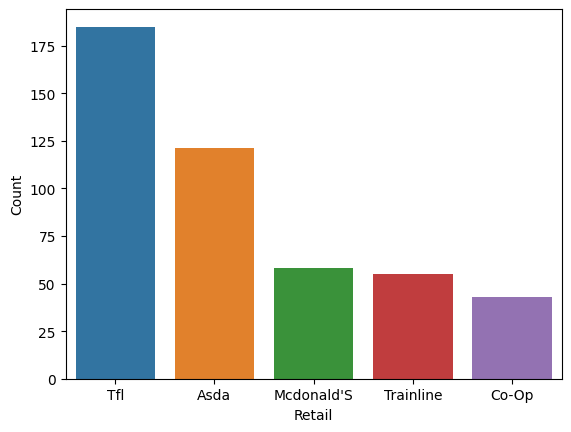

In [2585]:
counts = df['Retail'].value_counts()
top5Frequent = pd.DataFrame({'Retail': counts[counts.index!='Other'].index[:5],
                          'Count': counts[counts.index!='Other'].values[:5]})
sns.barplot(data=top5Frequent,x='Retail',y='Count')


__4.3 Retail where most amount of money is spent__

<Axes: xlabel='Retail', ylabel='Amount'>

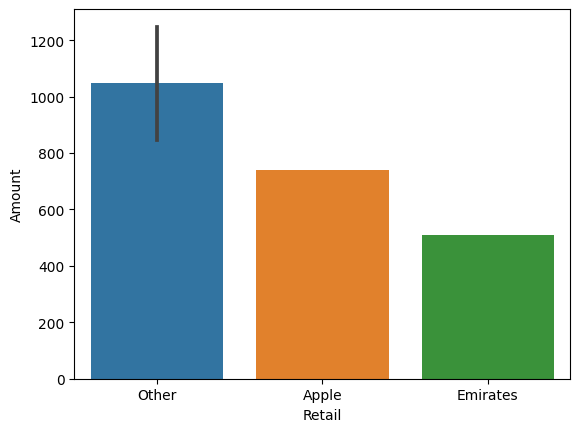

In [2586]:
sns.barplot(data=df.sort_values('Amount', ascending=False).head(5),x='Retail',y='Amount')


4.4. ARIMA Analysis

In [2587]:
dfA = df[['Date','Amount']]

In [2588]:
dfA = dfA.groupby(dfA['Date']).sum()

In [2589]:
dfA = dfA.sort_index()
dfA

,Amount
Date,
2021-10-02,898.80
2021-10-03,6.95
2021-10-04,3.10
2021-10-06,3.10
2021-10-07,9.55
...,...
2022-12-25,1.59
2022-12-26,14.01
2022-12-27,25.40


In [2590]:
dfA = dfA.reindex(pd.date_range(df['Date'].min(),df['Date'].max()), fill_value=0)

In [2591]:
dfA

,Amount
2021-10-02,898.80
2021-10-03,6.95
2021-10-04,3.10
2021-10-05,0.00
2021-10-06,3.10
...,...
2022-12-26,14.01
2022-12-27,25.40
2022-12-28,0.00
2022-12-29,48.99


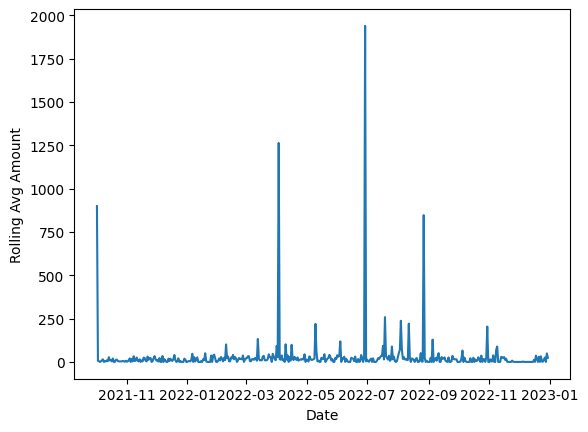

In [2592]:
plt.xlabel('Date')
plt.ylabel('Rolling Avg Amount')
plt.plot(dfA)

In [2593]:
dfA=dfA.rolling(window=30).mean().dropna()

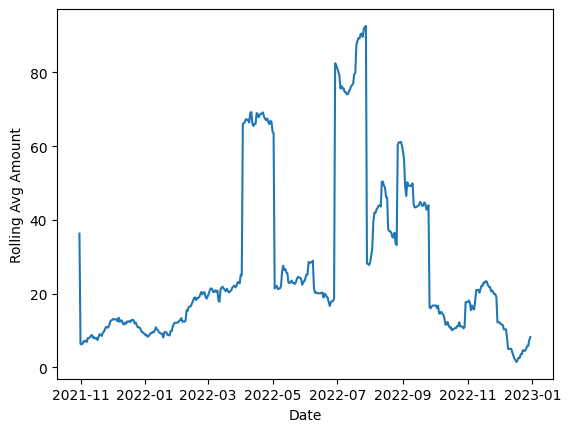

In [2594]:
plt.xlabel('Date')
plt.ylabel('Rolling Avg Amount')
plt.plot(dfA)

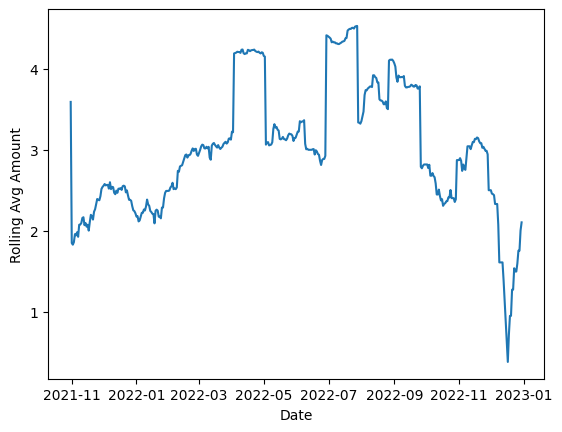

In [2595]:
plt.xlabel('Date')
plt.ylabel('Rolling Avg Amount')
plt.plot(np.log(dfA))

In [2596]:
dfA = np.log(dfA).dropna()

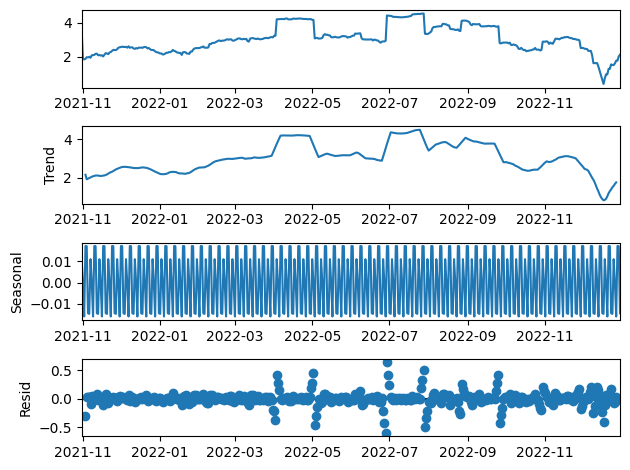

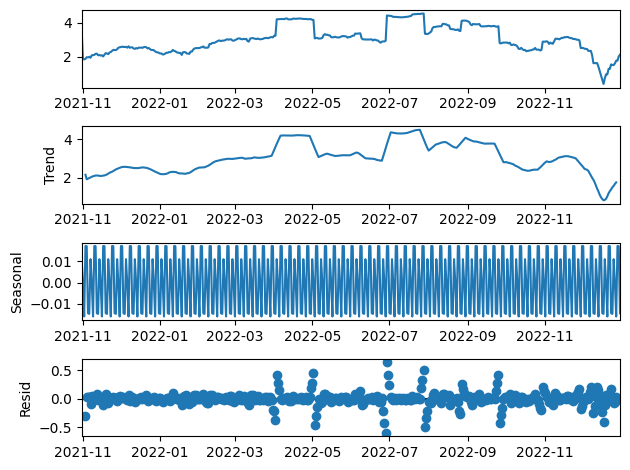

In [2597]:
seasonal_decompose(dfA).plot()

In [2598]:
result = adfuller(dfA)
print('p-value: {}'.format(result[1]))

p-value: 0.22243854905604038


/Users/nirdeshacharya/miniconda3/envs/CreditCardCleaning/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


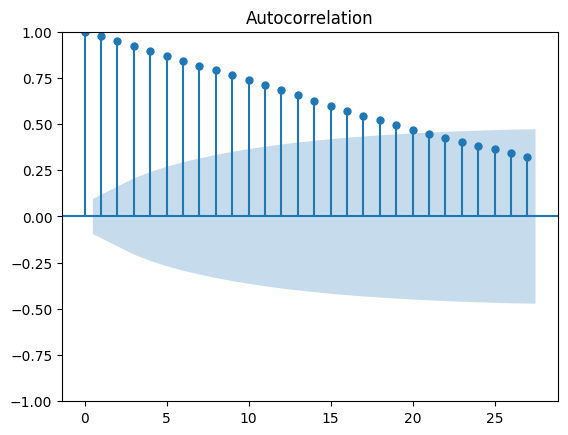

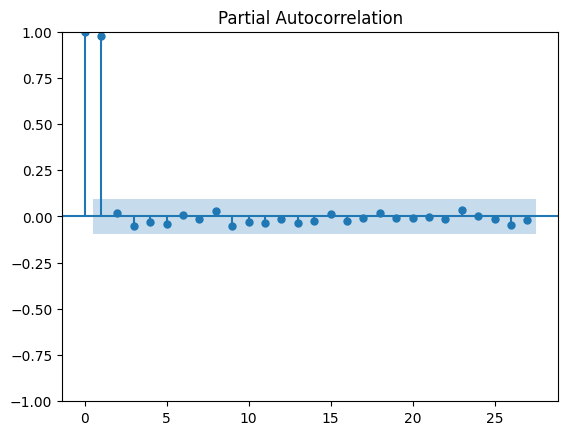

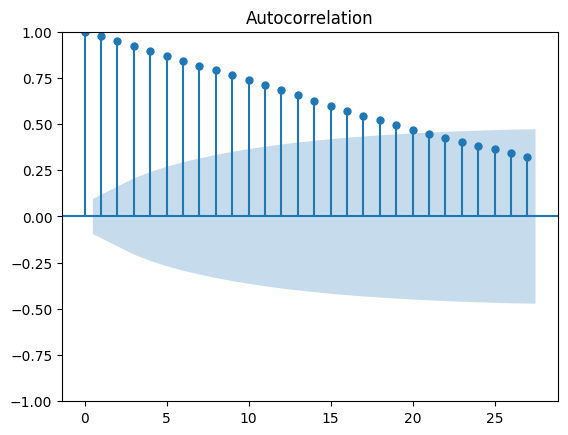

In [2599]:
plot_pacf(dfA)
plot_acf(dfA)

In [2600]:
dfA2Diff = dfA.diff().diff().dropna()


/Users/nirdeshacharya/miniconda3/envs/CreditCardCleaning/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


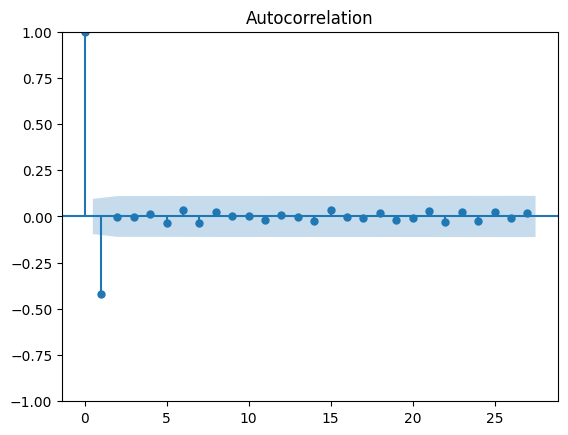

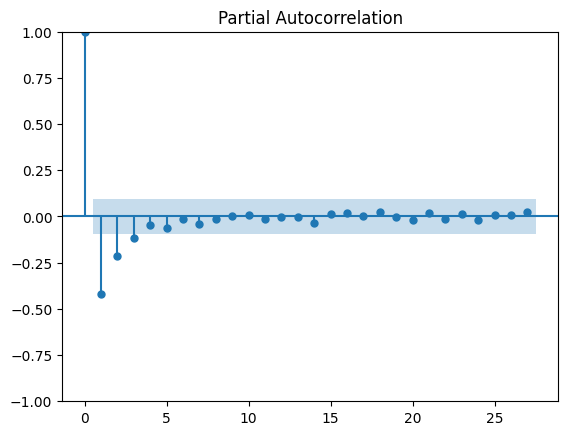

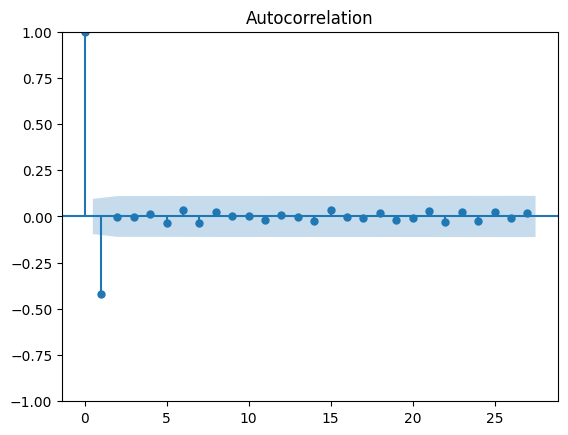

In [2601]:
plot_pacf(dfA2Diff)
plot_acf(dfA2Diff)

In [2602]:
result = adfuller(dfA2Diff)
print('p-value: {}'.format(result[1]))

p-value: 1.28894644150165e-15


In [2603]:

from pmdarima.arima import auto_arima

arima_model =  auto_arima(dfA2Diff,seasonal=False,stepwise=True )
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  424
Model:               SARIMAX(5, 0, 0)   Log Likelihood                 119.243
Date:                Thu, 13 Apr 2023   AIC                           -226.485
Time:                        00:11:16   BIC                           -202.187
Sample:                    11-02-2021   HQIC                          -216.885
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7779      0.027    -29.336      0.000      -0.830      -0.726
ar.L2         -0.5992      0.039    -15.391      0.000      -0.675      -0.523
ar.L3         -0.4410      0.045     -9.764      0.000      -0.529      -0.352
ar.L4         -0.2798      0.047     -5.915      0.000      -0.372      -0.187
ar.L5         -0.1680      0.038     -4.398      0.000      -0.243      -0.093
sigma2         0.0333      0.001     53.994      0.000       0.032       0.034
===================================================================================
Ljung-Box (L1) (Q):                   5.72   Jarque-Bera (JB):             13489.22
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             1.37
Prob(H) (two-sided):                  0.89   Kurtosis:                        30.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [2604]:
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(dfA2Diff,order=(5,0,0))
result_arima=model_arima.fit()
print(result_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                 Amount   No. Observations:                  424
Model:                 ARIMA(5, 0, 0)   Log Likelihood                 119.398
Date:                Thu, 13 Apr 2023   AIC                           -224.795
Time:                        00:11:16   BIC                           -196.447
Sample:                    11-02-2021   HQIC                          -213.595
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0015      0.003      0.499      0.618      -0.004       0.007
ar.L1         -0.7780      0.027    -29.233      0.000      -0.830      -0.726
ar.L2         -0.5993      0.039    -15.329      0.0

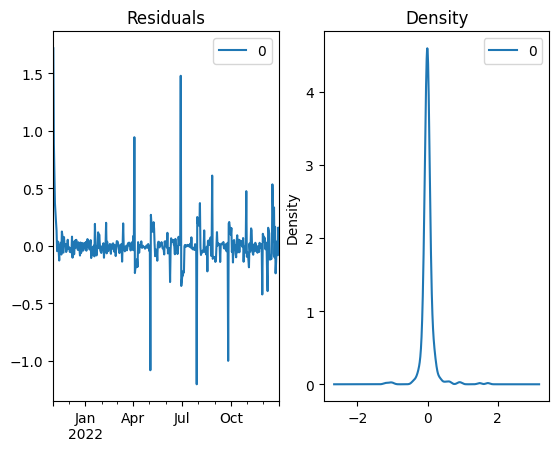

In [2605]:
residuals = pd.DataFrame(result_arima.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

<Axes: ylabel='predicted_mean'>

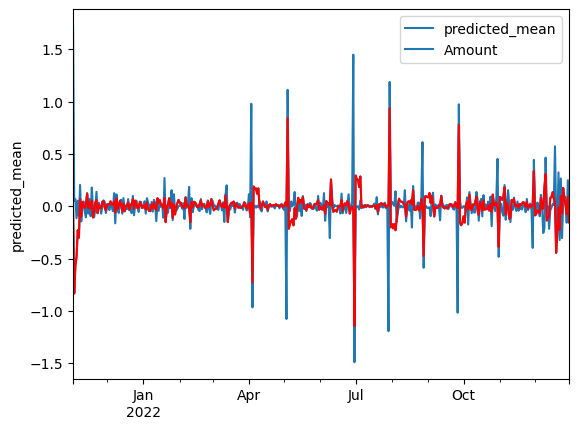

In [2606]:
result_arima.predict(dynamic=False).plot()
sns.lineplot(dfA2Diff)
sns.lineplot(result_arima.predict(dynamic=False), color='red')



/Users/nirdeshacharya/miniconda3/envs/CreditCardCleaning/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


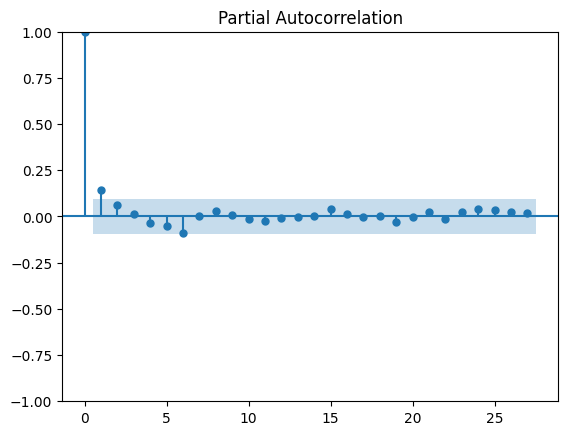

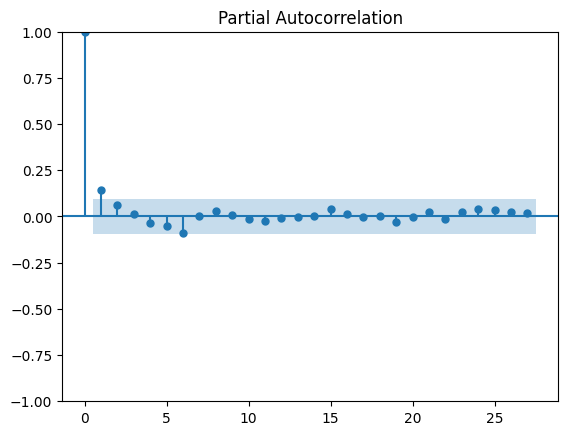

In [2607]:
plot_pacf(residuals)


In [2608]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [2609]:
print('Accuracy Matrix (MAE,MSE,MAE,RMSE))')

print(mean_absolute_percentage_error(result_arima.predict(), dfA2Diff))
print(mean_squared_error(result_arima.predict(), dfA2Diff))
print(mean_absolute_error(result_arima.predict(), dfA2Diff))
print(np.sqrt(mean_squared_error(result_arima.predict(), dfA2Diff)))

Accuracy Matrix (MAE,MSE,MAE,RMSE))
29.756592609170987
0.03643346438914932
0.0844492379352126
0.19087552066503793


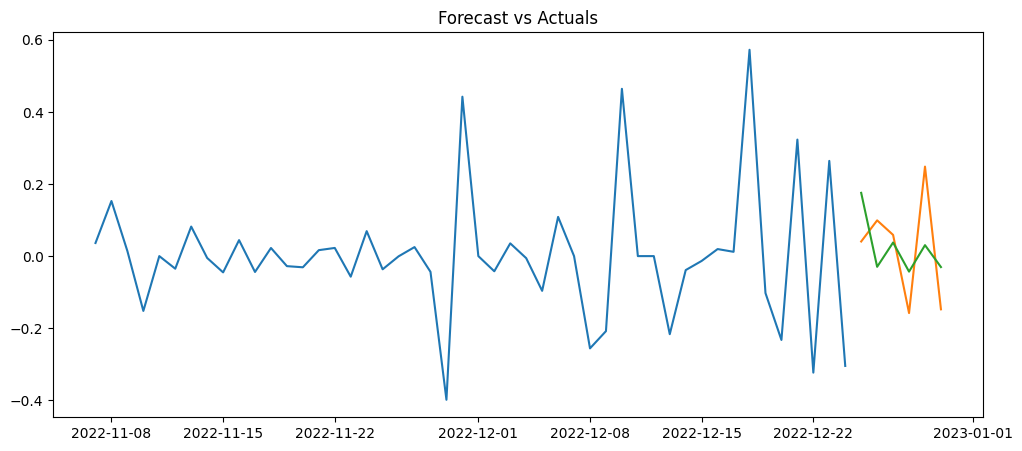

Accuracy Matrix (MAE,MSE,MAE,RMSE))
3.2275856179906923
0.01829417613174081
0.12254177634176333
0.13525596523533004


In [2610]:
train = dfA2Diff[:418]
test = dfA2Diff[418:]

model_arima_train = ARIMA(train,order=(5,0,0))
result_arima_train=model_arima_train.fit()

# Forecast
fc= result_arima_train.forecast(6, alpha=0.05)  # 95% conf
fc_series = pd.Series(fc, index=test.index)



# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train[370:], label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')

plt.title('Forecast vs Actuals')
plt.show()
print('Accuracy Matrix (MAE,MSE,MAE,RMSE))')

print(mean_absolute_percentage_error(fc, test))
print(mean_squared_error(fc, test))
print(mean_absolute_error(fc, test))
print(np.sqrt(mean_squared_error(fc, test)))